# 📊 Model Comparison – CV Lab Part II

**Author:** Tsion Bizuayehu  
**Course:** MSc AI – Addis Ababa University  
**Lab Focus:** Comparing KNN, SVM, and Decision Tree classifiers on synthetic image data

---

## 🧠 Objectives

- Train and evaluate three classifiers: KNN, SVM, Decision Tree  
- Use synthetic grayscale image data (64×64)  
- Compare accuracy and confusion matrices  
- Visualize performance side-by-side

---





## 📦 Environment Setup

This notebook uses Python 3.12 and the following key libraries:

- `numpy` for numerical operations  
- `matplotlib` and `seaborn` for visualization  
- `scikit-learn` for loading the digit dataset and training classifiers

Make sure your environment is activated (e.g., via Anaconda or virtualenv), and the required packages are installed. You can install them using:

```bash
pip install numpy matplotlib seaborn scikit-learn


In [20]:


# Core libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)


## 📦 Dataset Generation

We use the built-in digit dataset from `sklearn.datasets.load_digits`. It contains 1,797 grayscale images of handwritten digits (0–9), each sized 8×8 pixels. Each image is flattened into a 64-dimensional feature vector, making it ideal for training classifiers like KNN, SVM, and Decision Tree.

The dataset is already labeled and preprocessed, so no manual image handling is required.


In [23]:


# Load the digit dataset
digits = load_digits()
X = digits.data  # Flattened 8x8 grayscale images
y = digits.target  # Digit labels (0–9)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


Total samples: 1797
Training samples: 1257
Test samples: 540


## Visualize Sample Digits

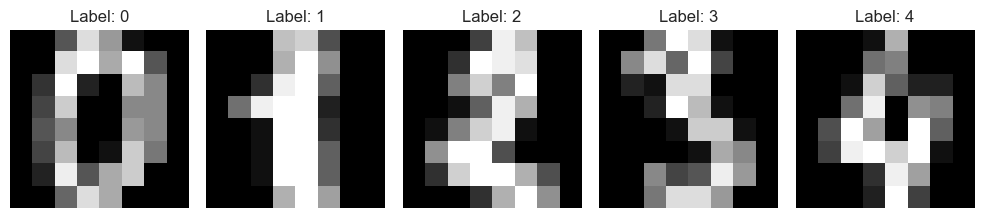

In [26]:

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis("off")
plt.tight_layout()
plt.show()


## 🧪 Model Training & Evaluation

We train three classifiers on the digit dataset:

- **K-Nearest Neighbors (KNN)** with `k=3`
- **Support Vector Machine (SVM)** with a linear kernel
- **Decision Tree** with default depth

Each model is trained on 70% of the data and evaluated on the remaining 30%. We report accuracy and a full classification report for each.


In [29]:

# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel="linear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "model": model,
        "accuracy": acc,
        "confusion_matrix": cm,
        "report": classification_report(y_test, y_pred, output_dict=True)
    }
    
    print(f"🔍 {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))


🔍 KNN Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      0.98      0.99        55
           8       0.98      0.98      0.98        43
           9       0.98      0.93      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

🔍 SVM Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00   

## 📊 Confusion Matrix Visualization

Confusion matrices show how well each classifier distinguishes between digit classes. Each row represents the actual label, and each column represents the predicted label. Diagonal values indicate correct predictions.

We visualize confusion matrices for KNN, SVM, and Decision Tree using `seaborn` heatmaps.


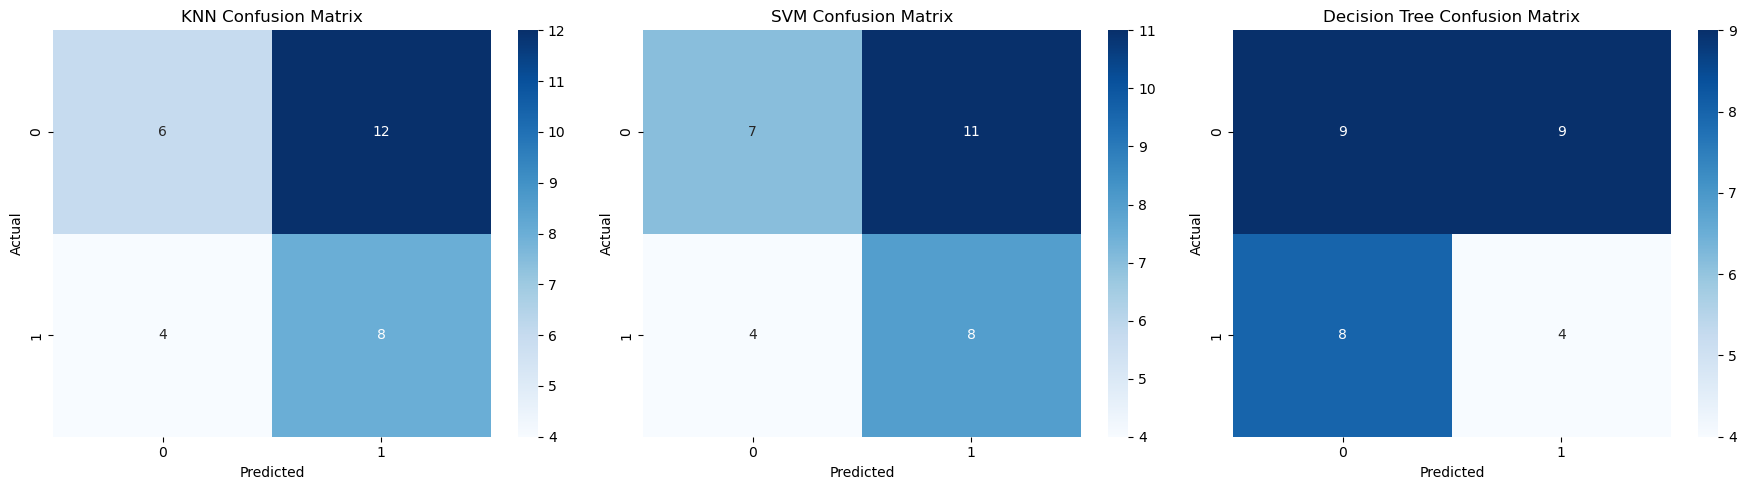

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, res) in zip(axes, results.items()):
    cm = res["confusion_matrix"]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()
